In [93]:
import pandas as pd
import numpy as np
import math
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df=pd.read_csv(r'C:\Users\nikit\OneDrive\Desktop\Psn\Árvores de decisão\german_credit_data.csv',header=0)


In [94]:
#2

df.drop(df.columns[0],1,inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [95]:
#4

df1=df
i=0

for x in df1['Purpose']:
    if x=="radio/TV": 
           continue
        
    elif x=="car":
           continue 
    else:
         df1['Purpose'] = df1['Purpose'].replace([x],'Other')

        
#df1     

item_counts = df1['Purpose'].value_counts(normalize=True)
item_counts
# Doencas=df1["Purpose"].unique().tolist()
# Doencas



Other       0.383
car         0.337
radio/TV    0.280
Name: Purpose, dtype: float64

In [96]:
#5
#por primeiros 10 valores na df2

df2=df1.head(10)
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,Other
3,45,male,2,free,little,little,7882,42,Other
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,Other
6,53,male,2,own,quite rich,NaN,2835,24,Other
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [97]:
#6
#não foi preciso utilizar
dataDesc = {
    "Age": "Cont" ,
    "Sex": "Disc",
    "Job": "Disc",
    "Housing": "Disc",
    "Saving accounts": "Disc",
    "Credit amount": "Cont",
    "Duration": "Cont",
    "Purpose": "Disc",
}
print(dataDesc)

{'Age': 'Cont', 'Sex': 'Disc', 'Job': 'Disc', 'Housing': 'Disc', 'Saving accounts': 'Disc', 'Credit amount': 'Cont', 'Duration': 'Cont', 'Purpose': 'Disc'}


In [98]:
#7

#com a amostra
df2.fillna(df2.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df2.fillna(df2.select_dtypes(include='object').mode().iloc[0], inplace=True)


#com o DF completo

df1.fillna(df1.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df1.fillna(df1.select_dtypes(include='object').mode().iloc[0], inplace=True)

df2

C:\Users\nikit\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\nikit\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,44.8,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,44.8,2096,12,Other
3,45,male,2,free,little,little,7882,42,Other
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,44.8,44.8,9055,36,Other
6,53,male,2,own,quite rich,44.8,2835,24,Other
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,44.8,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [99]:
#8



#a)
def gini(probs):
    
    soma = 0
    for i in probs:
        soma = soma + i**2
    return(1-soma)

val = [0.25,0.25,0.25,0.25]
gini(val)



#b)
def entropy(probs):
    
    soma = 0
    for i in probs:
        soma = soma + i * math.log(i,2)
    return(-soma)

entropy(val)


#c)

# def CalcDT(df,vars,classe,ef):
    






2.0

In [100]:
#9
tt={'male':0, 
    'female':1, 
    'own':0, 
    'free':1, 
    'rent':2, 
    'little':0, 
    'quite rich':1, 
    'rich':2, 
    'moderate':1, 
    'radio/TV':0, 
    'Other':1, 
    'car':2}



#para df completo
df1=df1.replace(tt)


feature_cols = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration']
X = df1[feature_cols] # Features
y = df1.Purpose # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4066666666666667


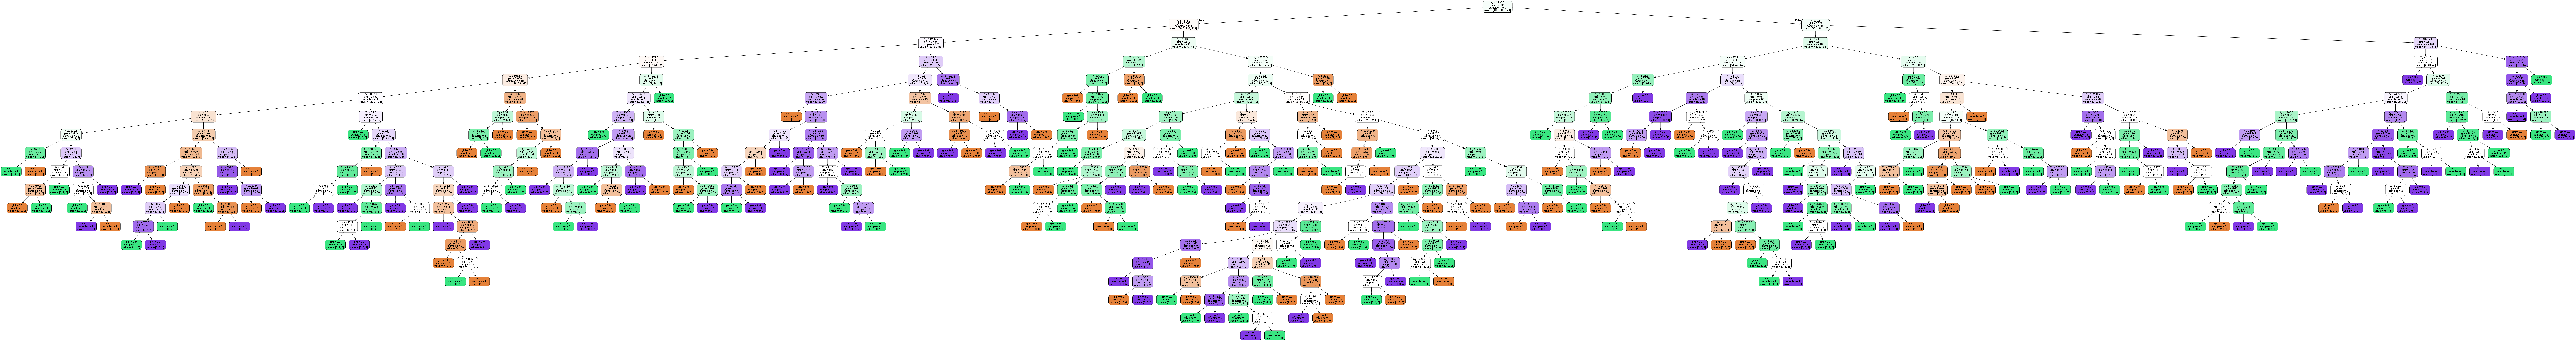

In [101]:
#10
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image 
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

# Não foi utilizado 

In [102]:

# #foi para testar o 8
# teste=pd.read_csv(r'teste_2.csv',header=0)
# teste

# nomes=list(teste.columns.values.tolist())
# nomes


# dic = {
#     "continuo1": "Cont" ,
#     "discreto1": "Disc",
#      "continuo2": "Cont" ,
#     "discreto2": "Disc",
# }


# # for i in nomes:
# #     if dic.get(i)=="Cont": 
# #         teste.fillna(teste.select_dtypes(include='number').mean().iloc[0], inplace=True)

# # #        print("coisa")
    
        
# #     if dic.get(i)=="Disc":
# #         teste[i].fillna(teste[i].mode().iloc[0],inplace=True)
#         # numeric columns
# teste.fillna(teste.select_dtypes(include='number').mean().iloc[0], inplace=True)

# # categorical columns
# teste.fillna(teste.select_dtypes(include='object').mode().iloc[0], inplace=True)



# #gini

# vect_prob=[]

# num_elem=len(teste)
# # pixas=teste['class'].count()
# num_class=teste['class'].value_counts()
        

# for i in num_class:
#     prob=i/num_elem
#     vect_prob.append(prob)

    
# vect_prob    

[0.42857142857142855, 0.42857142857142855, 0.14285714285714285]